# Building Data Pipline Project 1
Prepared by:

Name: Mohamed Elyass Mohamed Ahmed

Passport: P06382503

School of Data Science

--------------

Will do:

1- Full data extruction

2- Full data transforming

3- Full data loading

## 1- Data extraction stage:
    From csv file

In [3]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns  

In [4]:
df = pd.read_csv(r'C:\Users\HP\Documents\archive.zip')

C:\Users\HP\AppData\Local\Temp\ipykernel_8884\1685938542.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\HP\Documents\archive.zip')


In [5]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


# 2- Data  Transforming:

In [6]:
####  feature engineering

####  Remove duplicates

####  Handle missing values

####  Fix typos and inconsistent formats

####  Convert data types

####  Standardize values (e.g., units, categories)

####  Filter rows and columns

####  Join/merge multiple datasets

####  Sort/order data

####  Validate transformed data

###  Handle missing values

In [7]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
df.shape

(102599, 26)

In [9]:
df.drop('license', axis=1, inplace=True)

In [10]:
df.drop('house_rules', axis=1, inplace=True)

In [11]:
df.shape

(102599, 24)

In [12]:
df['reviews per month'].mean()

1.374021909594096

In [13]:
df['reviews per month'].fillna(1.374021909594096, inplace=True)

In [14]:
df['review rate number'].mean()

3.279105922384207

In [15]:
df['review rate number'].fillna(3.279105922384207,inplace=True)

In [16]:
df['last review'].mode()

0    6/23/2019
Name: last review, dtype: object

In [17]:
df['last review'].fillna(6/23/2019, inplace=True)

### Re cheack null values

In [18]:
df.isna().sum()

id                                  0
NAME                              250
host id                             0
host_identity_verified            289
host name                         406
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
country                           532
country code                      131
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
last review                         0
reviews per month                   0
review rate number                  0
calculated host listings count    319
availability 365                  448
dtype: int64

#### Not too many rows comparing to the total so, just remove all

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

## Feature selection  

In [21]:
df.drop('neighbourhood',axis=1,inplace=True)

In [22]:
df.drop('availability 365',axis=1,inplace=True)

In [23]:
df.drop('id',axis=1,inplace=True)

In [24]:
df.drop('NAME',axis=1,inplace=True)

In [25]:
df.drop('host id',axis=1,inplace=True)

In [26]:
df.drop('long',axis=1,inplace=True)

In [27]:
df.drop('lat',axis=1,inplace=True)

In [28]:
df.drop('calculated host listings count',axis=1,inplace= True)
       

In [29]:
df.columns

Index(['host_identity_verified', 'host name', 'neighbourhood group', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number'],
      dtype='object')

In [30]:
df.head(3)

,host_identity_verified,host name,neighbourhood group,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number
0,unconfirmed,Madaline,Brooklyn,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0
1,verified,Jenna,Manhattan,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0
4,verified,Lyndon,Manhattan,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0


In [92]:
df.duplicated().sum()

3858

In [99]:
df = df.drop_duplicates()

In [100]:
df.duplicated().sum()

0

## Need to rearange the rows

In [101]:
df.reset_index(inplace=True)

In [120]:
df.head(10)

,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
0,unconfirmed,Madaline,False,strict,Private room,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4
1,verified,Jenna,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4
2,verified,Lyndon,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3
3,verified,Michelle,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3
4,unconfirmed,Emma,False,moderate,Private room,2009.0,"1,060",212,45.0,49.0,2017-10-05,0.40,5
5,verified,Evelyn,True,strict,Private room,2005.0,"1,018",204,2.0,430.0,2019-06-24,3.47,3
6,unconfirmed,Carl,False,strict,Private room,2015.0,291,58,2.0,118.0,2017-07-21,0.99,5
7,verified,Miranda,False,flexible,Entire home/apt,2004.0,319,64,1.0,160.0,2019-06-09,1.33,3
8,verified,Alan,True,flexible,Entire home/apt,2008.0,606,121,5.0,53.0,2019-06-22,0.43,4
9,verified,Darcy,True,moderate,Private room,2010.0,580,116,4.0,167.0,2019-06-24,1.34,4


## changing columns names 

In [121]:
df.rename(columns= {"review rate number":"review rate", "number of reviews": "review numbers"},inplace=True)

In [122]:
df.drop('index',axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [ ]:
df.rename(columns= {"level_0":"index"},inplace=True)

In [ ]:
df.rename(columns= {"last review":"time"},inplace=True)

In [ ]:
df.columns

Index(['host_identity_verified', 'host name', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'review numbers', 'time',
       'reviews per month', 'review rate'],
      dtype='object')

In [ ]:
df.head(5)

,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
0,unconfirmed,Madaline,False,strict,Private room,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4
1,verified,Jenna,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4
2,verified,Lyndon,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3
3,verified,Michelle,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3
4,unconfirmed,Emma,False,moderate,Private room,2009.0,"1,060",212,45.0,49.0,2017-10-05,0.40,5


In [ ]:
df.dtypes

host_identity_verified            object
host name                         object
instant_bookable                  object
cancellation_policy               object
room type                         object
Construction year                float64
price                             object
service fee                        int64
minimum nights                   float64
review numbers                   float64
time                      datetime64[ns]
reviews per month                float64
review rate                        Int64
dtype: object

## Changing data type of the time from object to datetime format 

In [ ]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

In [ ]:
df.dtypes

host_identity_verified            object
host name                         object
instant_bookable                  object
cancellation_policy               object
room type                         object
Construction year                float64
price                             object
service fee                        int64
minimum nights                   float64
review numbers                   float64
time                      datetime64[ns]
reviews per month                float64
review rate                        Int64
dtype: object

In [ ]:
df['time'].isna().sum()

0

In [ ]:
df.isna().sum()

host_identity_verified    0
host name                 0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
review numbers            0
time                      0
reviews per month         0
review rate               0
dtype: int64

In [ ]:
df['time'].mode()

0   2019-06-23
Name: time, dtype: datetime64[ns]

In [ ]:
df['time'].fillna('2019-06-23',inplace=True)

In [ ]:
df.isna().sum()

host_identity_verified    0
host name                 0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
review numbers            0
time                      0
reviews per month         0
review rate               0
dtype: int64

In [ ]:
df.time.dt.year.value_counts().sort_values(ascending=False)

time
2019    54339
2018    10562
2022    10142
2021     6125
2017     6020
2016     4053
2020     2047
2015     1768
2014      233
2013       72
2012       25
Name: count, dtype: int64

## Replacing $ sign with blank " "

In [ ]:
df['price'] = df['price'].str.replace('$','')

In [ ]:
df['service fee'] = df['service fee'].str.replace('$','')

AttributeError: Can only use .str accessor with string values!

In [ ]:
df.head(4)

,host_identity_verified,host name,neighbourhood group,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
0,unconfirmed,Madaline,Brooklyn,United States,US,False,strict,Private room,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4.0
1,verified,Jenna,Manhattan,United States,US,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4.0
2,verified,Lyndon,Manhattan,United States,US,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3.0
3,verified,Michelle,Manhattan,United States,US,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3.0


###  Round to nearest integer in review rate

In [ ]:
df['review rate'] = pd.to_numeric(df['review rate'], errors='coerce').round(0).astype('Int64')


In [ ]:
df['country code'].value_counts()

country code
US    99244
Name: count, dtype: int64

In [ ]:
df.shape

(99244, 16)

## I think no need for country code, since all representing one country which is US

In [ ]:
df.drop('country code', axis=1, inplace=True)

In [ ]:
df.head(4)

,host_identity_verified,host name,neighbourhood group,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
0,unconfirmed,Madaline,Brooklyn,United States,False,strict,Private room,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4.0
1,verified,Jenna,Manhattan,United States,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4.0
2,verified,Lyndon,Manhattan,United States,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3.0
3,verified,Michelle,Manhattan,United States,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3.0


In [ ]:
df.drop('neighbourhood group', axis=1, inplace=True)

In [ ]:
df.drop('country', axis=1, inplace=True)

### I think all is good, and now we ready for answering any needed questions 

##  Data analysis ..optional

In [123]:
df.head(4)

,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
0,unconfirmed,Madaline,False,strict,Private room,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4
1,verified,Jenna,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4
2,verified,Lyndon,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3
3,verified,Michelle,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3


In [124]:
df['cancellation_policy'].value_counts()

cancellation_policy
moderate    31970
strict      31708
flexible    31708
Name: count, dtype: int64

In [125]:
df['Construction year'].value_counts()

Construction year
2014.0    4869
2008.0    4860
2006.0    4854
2020.0    4833
2010.0    4828
2009.0    4825
2019.0    4816
2005.0    4790
2012.0    4776
2015.0    4773
2022.0    4766
2003.0    4763
2007.0    4748
2017.0    4734
2011.0    4709
2013.0    4701
2021.0    4699
2018.0    4684
2016.0    4681
2004.0    4677
Name: count, dtype: int64

In [126]:
df.groupby('cancellation_policy')['room type'].value_counts()

cancellation_policy  room type      
flexible             Entire home/apt    16727
                     Private room       14253
                     Shared room          688
                     Hotel room            40
moderate             Entire home/apt    16730
                     Private room       14522
                     Shared room          681
                     Hotel room            37
strict               Entire home/apt    16626
                     Private room       14365
                     Shared room          686
                     Hotel room            31
Name: count, dtype: int64

In [127]:
df.groupby('Construction year')['host_identity_verified'].value_counts()

Construction year  host_identity_verified
2003.0             verified                  2387
                   unconfirmed               2376
2004.0             unconfirmed               2344
                   verified                  2333
2005.0             unconfirmed               2471
                   verified                  2319
2006.0             unconfirmed               2456
                   verified                  2398
2007.0             unconfirmed               2393
                   verified                  2355
2008.0             unconfirmed               2443
                   verified                  2417
2009.0             unconfirmed               2413
                   verified                  2412
2010.0             verified                  2430
                   unconfirmed               2398
2011.0             verified                  2374
                   unconfirmed               2335
2012.0             verified                  2426
        

## Deep Q uestion:

What is sum of sevice fees per each room type gategory in year 2013
when host_identity_verified was verified and cancellation_policy was flexible ?

Also, What is max of price per each room type gategory in year 2013
when host_identity_verified was verified and cancellation_policy was flexible ?

In [128]:
df.head(3)

,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
0,unconfirmed,Madaline,False,strict,Private room,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4
1,verified,Jenna,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4
2,verified,Lyndon,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3


In [129]:
df1 = df[df['Construction year'] == 2013.0]

In [130]:
df1.head(5)

,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
3,verified,Michelle,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3
44,verified,Daniel,True,strict,Entire home/apt,2013.0,175,35,30.0,80.0,2019-05-26,0.75,2
87,verified,Farrell,True,moderate,Entire home/apt,2013.0,178,36,2.0,191.0,2019-06-20,1.88,2
104,verified,Wright,True,moderate,Entire home/apt,2013.0,162,32,4.0,6.0,2016-02-05,0.10,5
116,verified,Lloyd,True,strict,Private room,2013.0,"1,137",227,3.0,380.0,2019-06-26,3.83,4


In [131]:
df2 = df1[df1['host_identity_verified'] == 'verified']

In [132]:
df2.head(4)

,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
3,verified,Michelle,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3
44,verified,Daniel,True,strict,Entire home/apt,2013.0,175,35,30.0,80.0,2019-05-26,0.75,2
87,verified,Farrell,True,moderate,Entire home/apt,2013.0,178,36,2.0,191.0,2019-06-20,1.88,2
104,verified,Wright,True,moderate,Entire home/apt,2013.0,162,32,4.0,6.0,2016-02-05,0.10,5


In [133]:
df3 = df2[df2['cancellation_policy'] == 'flexible']

In [134]:
df3.head(4)

,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,review numbers,time,reviews per month,review rate
3,verified,Michelle,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3
444,verified,Moore,True,flexible,Private room,2013.0,"1,026",205,5.0,123.0,2019-02-28,1.42,3
520,verified,Holmes,False,flexible,Entire home/apt,2013.0,984,197,5.0,1.0,2014-09-04,0.02,3
534,verified,Reed,False,flexible,Private room,2013.0,"1,143",229,3.0,14.0,2019-04-04,0.16,4


In [135]:
df3.groupby('room type')['service fee'].sum()

room type
Entire home/apt    52354
Private room       48017
Shared room         2137
Name: service fee, dtype: int64

## Solution: Convert 'service fee' to numeric and then sum:


In [136]:
df3['service fee'] = pd.to_numeric(df3['service fee'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_8884\2133419801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['service fee'] = pd.to_numeric(df3['service fee'], errors='coerce')


In [137]:
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

In [138]:
df3.groupby('room type')['service fee'].sum()

room type
Entire home/apt    52354
Private room       48017
Shared room         2137
Name: service fee, dtype: int64

In [139]:
df3.groupby('room type')['price'].max().sort_values(ascending=False)

room type
Shared room        998 
Entire home/apt    997 
Private room       995 
Name: price, dtype: object

## By the same way, we can filter any other year, and also can reach to any place or ceil inside the dataset 




Unfortunately am not familiar with this dataset inorder to generate questions from

So I will try to chose a dataset that am familiar with so i can show u there all my analtyical skills,

and also try to answer more questions, which u may consider useful for the research to inhance and lad to better decison making.

# 3- Data visualization:

<Axes: xlabel='cancellation_policy'>

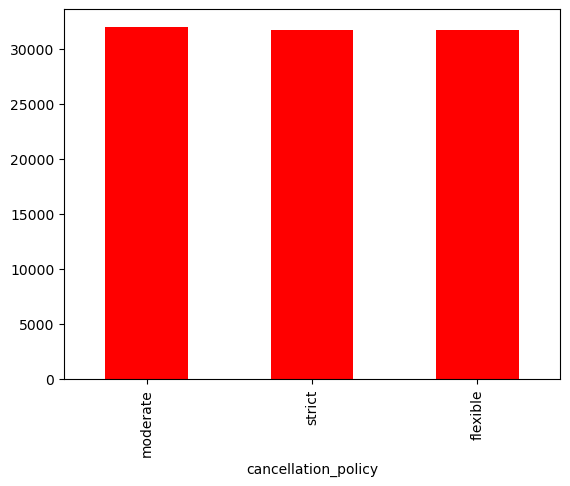

In [140]:
df['cancellation_policy'].value_counts().plot(kind='bar', color='red')

<Axes: ylabel='service fee'>

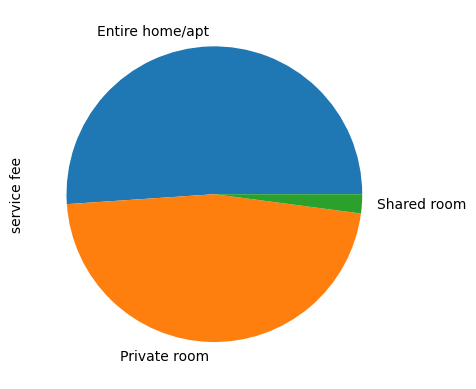

In [141]:
df3.groupby('room type')['service fee'].sum().plot(kind= 'pie')


In [142]:
df3['price'] = pd.to_numeric(df3['price'], errors='coerce')  

C:\Users\HP\AppData\Local\Temp\ipykernel_8884\713749004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price'] = pd.to_numeric(df3['price'], errors='coerce')


<Axes: ylabel='price'>

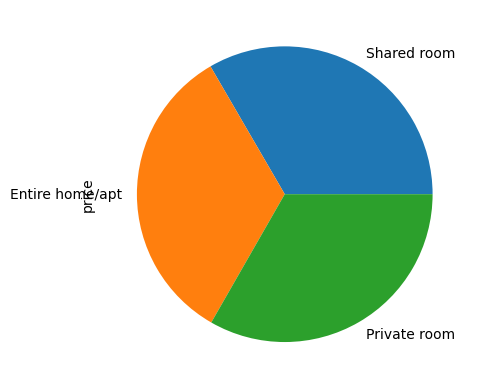

In [143]:
df3.groupby('room type')['price'].max().sort_values(ascending=False).plot(kind='pie')

## 3 -Data Loading stage

### (a) To Google BigQuery done

In [144]:
##### Done

### (b) To csv

In [149]:
df.to_csv('cleaned_reviews_data.csv', index=False)

### (c) To DB SQLite

In [150]:
# First, check if your DataFrame exists and has data
print("DataFrame info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"First few rows:")
print(df.head())

# Now save to database with error handling
import sqlite3
import pandas as pd

try:
    # Create connection
    conn = sqlite3.connect('reviews_data.db')
    
    # Save DataFrame to database
    df.to_sql('reviews', conn, if_exists='replace', index=False)
    
    # Verify it worked
    cursor = conn.cursor()
    cursor.execute("SELECT COUNT(*) FROM reviews;")
    row_count = cursor.fetchone()[0]
    print(f"Successfully saved {row_count} rows to database!")
    
    # Show table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print(f"Tables in database: {tables}")
    
    conn.close()
    
except Exception as e:
    print(f"Error: {e}")
    conn.close()

DataFrame info:
Shape: (95386, 13)
Columns: ['host_identity_verified', 'host name', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'review numbers', 'time', 'reviews per month', 'review rate']
First few rows:
  host_identity_verified host name instant_bookable cancellation_policy  \
0            unconfirmed  Madaline            False              strict   
1               verified     Jenna            False            moderate   
2               verified    Lyndon            False            moderate   
3               verified  Michelle             True            flexible   
4            unconfirmed      Emma            False            moderate   

         room type  Construction year   price  service fee  minimum nights  \
0     Private room             2020.0    966           193            10.0   
1  Entire home/apt             2007.0    142            28            30.0   
2  Entire home/apt             200

# Done

In [151]:
df.isna().sum()

host_identity_verified    0
host name                 0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
review numbers            0
time                      0
reviews per month         0
review rate               0
dtype: int64

In [152]:
df.duplicated().sum()

0